In [7]:
import numpy
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
test = pd.read_csv('human_test.csv')

In [6]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Create example arrays
arr1 = np.array(test['Jack'])
arr2 = np.array(test['Leo'])
arr3 = np.array(test['Sam'])

# Calculate Cohen's Kappa for each pair
kappa_12 = cohen_kappa_score(arr1, arr2)
kappa_13 = cohen_kappa_score(arr1, arr3)
kappa_23 = cohen_kappa_score(arr2, arr3)

# Print the results
print(f"Kappa between arr1 and arr2: {kappa_12:.3f}")
print(f"Kappa between arr1 and arr3: {kappa_13:.3f}")
print(f"Kappa between arr2 and arr3: {kappa_23:.3f}")

# Average the Kappa scores
average_kappa = (kappa_12 + kappa_13 + kappa_23) / 3
print(f"Average Kappa: {average_kappa:.3f}")



/Users/liytu/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Kappa between arr1 and arr2: 0.633
Kappa between arr1 and arr3: 0.569
Kappa between arr2 and arr3: 0.511
Average Kappa: 0.571


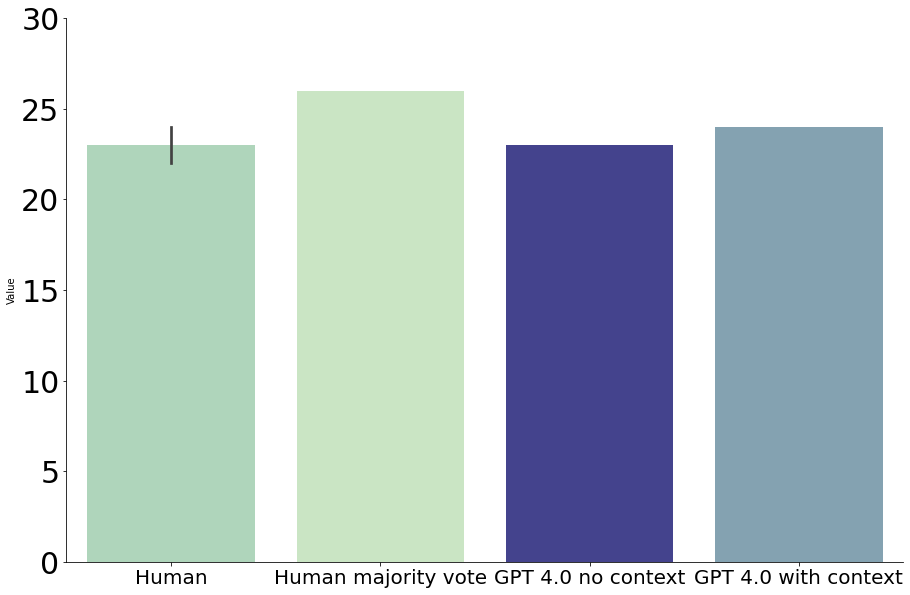

In [29]:
human_sti = np.array([22, 23, 24])
gpt_no_context = np.array([23, 23, 23])
majority = np.array([26, 26, 26])
gpt_with_context = np.array([24, 24, 24])

data_to_plot = {
    "counts": np.concatenate([human_sti, majority, gpt_no_context, gpt_with_context]),
    "names": ["Human"] * 3 + ["Human majority vote"] * 3 + ["GPT 4.0 no context"] * 3 + ["GPT 4.0 with context"] * 3 
}

colors = [ '#A9DBB8', '#C6EBBE', '#38369A', '#7CA5B8']

fig, ax = plt.subplots(sharex=True, figsize=(15, 10))
sns.barplot(x="names", y="counts", data=data_to_plot, errorbar="sd", palette = colors,)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim([0, 30])

plt.ylabel("Value")
plt.savefig('f1.png', dpi=500)

In [2]:
# Load the JSON data from the file
with open('sarcasm_data.json', 'r') as file:
    data = dict(json.load(file))


# df = pd.DataFrame(list(data.items()), columns=['Key', 'Values'])
df = pd.DataFrame(data).T
df=df.reset_index()
df=df.rename(columns={'index': 'video'})
df.loc[:10,['video','context','utterance','sarcasm']]


,video,context,utterance,sarcasm
0,1_60,[I never would have identified the fingerprint...,It's just a privilege to watch your mind at work.,True
1,1_70,[This is one of my favorite places to kick bac...,I don't think I'll be able to stop thinking ab...,True
2,1_80,"[Here we go. Pad thai, no peanuts., But does i...","Since it's not bee season, you can have my epi...",False
3,1_90,[A marathon? How many Superman movies are ther...,"Lois Lane is falling, accelerating at an initi...",False
4,1_105,"[Great Caesar's ghost, look at this place., So...",I'm just inferring this is a couch because the...,True
5,1_162,"[On the other hand, no arousal., None?, None.,...","Sheldon, if you were a robot, and I knew and y...",False
6,1_175,"[Oh, good Lord., God, that's a good song.]",If you're compiling a mix CD for a double suic...,True
7,1_182,"[How do I look?, Could you be more specific?, ...",No. The dark crescent-shaped patterns under yo...,True
8,1_213,"[You know, I am not going to enjoy this party....","How's this? ""Pleased to meet you, Dr. Gablehau...",True
9,1_276,[He switched over to high-energy radiation res...,"Yeah, my parents felt that naming me Leonard a...",True
